# Задача:
Рассмватривается задача эксплутации возобновляемых ресурсов.Положим, что $x(t)$ представляет количество животной популяции,которая производит полезный субпродукт $y(t)$ за время $t \in [0,T]$. В то же время $y$ описывается некоторой непрерывной функцией $F(x)$,удовлетворяющей условию $F(0) = 0$. Управление $u(t)$ в этой задаче ограничено и принадлежит множеству $[0,1]$.
Тогда динамика системы описывается уравнением:
$$ \dot x = \alpha (x - \hat{x}) + (1 - u(t)) \cdot F(x(t)) ,$$
\
где $\hat{x} \geq 0$ - критическая масса для роста популяции, $\alpha \geq r$ - коэффициент роста.
При этом управляющая функция $u$ выбирается исходя из соображений максимизации следующего функционала:
$$ J = \int\limits_0^2e^{-t} \cdot u(t) \cdot \sqrt {x(t)} dt,$$
\
где $r$ - заданный понижающий коэффициент. Начальное и терминальное условия задаются следющим образом:
$$x(0) = {x_0}, x(2) = {x_0}$$

В данной постановке предлагается решить задачу нахождения оптимального управления при следующих условиях:
$$ \alpha = 1, r = 1, x_0 = 10, \hat{x} = 12, T = 2, F(x) = \sqrt{x}$$

# Решение: 
Для начала приведем фунционал к терминальному виду. Для этого введем новую переменную $\psi$:
$$ \dot{\psi} = e^{-t} \cdot u(t) \cdot \sqrt {x(t)}, \psi(0) = 0 $$
\
Тогда получим новую систему уравнений:
$$\begin{equation*}
 \begin{cases}
   \dot {x} = (x - 12) + (1 - u(t)) \cdot \sqrt{x}, 
   \\
  \dot{\psi} = e^{-t} \cdot u(t) \cdot \sqrt {x(t)}.
 \end{cases}
\end{equation*}$$
\
При это начальное многообразие примет вид:
\begin{equation*} 
R(t_0=0) \in A = 
 \begin{cases}
  x(0) = x_0,
   \\
  \psi(0) = 0.
   \end{cases}
\end{equation*}   

Функционал примет вид:
$$ J = Ф(x(T), T) = \psi(T) → {\underset{0 \leq u \leq u^*}{max}} $$

Таким образом рассматривается задача оптимального управления со свободным правым концом и зафиксированным временем.

Запишем функцию Гамильтона-Понтрягина для системы:
$$ H \ (x,p, u , t) = p_x(x - 12 + (1 - u) \cdot \sqrt x) + p_{\psi}(e^{-t} \cdot u \cdot \sqrt x) $$

Тогда уравнения на сопряженнуе переменные примут вид:

$$\begin{equation*}
 \begin{cases}
     \dot{p_x} = - \frac{\partial H}{\partial x} = \frac{p \cdot (u - 1 - 2\sqrt{x}) - u \cdot e^{-t}}{2 \cdot \sqrt x}
     \\
     \dot{p_{\psi}} = - \frac{\partial H}{\partial \psi} = 0
     \end{cases}
\end{equation*}$$

При этому условия трансверсальности на правом конце описываются следующими уравнениями:
$$ P(T) = \frac{\partial Ф}{\partial \begin{pmatrix} x\\ \psi\\t \end{pmatrix}} + \lambda_{t_f}  \frac{\partial t}{\partial \begin{pmatrix} x\\ \psi\\t \end{pmatrix}} = \begin{pmatrix} 0\\ 1\\\lambda_{t_f} \end{pmatrix},$$
\
где вектор фазовых переменных:
$$ P = \begin{pmatrix} p_x\\ p_{\psi}\\-H \end{pmatrix}.$$

Так как $p_{\psi} = const$ и из условия трансверсальности $p_{\psi}(T) = 1$, то $p_y = 1$ (далее везде будем осуществлять замену $p_{\psi} = 1$).

При этом условие максимума гамильтониана дает соотношение:
$$ -p_x \cdot u \cdot \sqrt{x} - p_{\psi} \cdot e^{-t} \cdot u \cdot \sqrt x → max $$


C учетом ограничений оптимальное управление определяется как:
$$
\left\{
    \begin{array}\\
       u = 1, e^{-t} > p   \\
       u = 0, e^{-t} < p \end{array}   
\right. 
$$

Переключение с одного режима на другой происходит на линии задаваемой выражаением:
$X$: $\sqrt{x} \cdot (e^{-t} - p) = 0$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math as mth

In [2]:
t0 = 0
tf = 2
x0 = 10
av_x = 12
alpha = 1
r = 0.1

In [3]:
def plotter(sol):
    
    x = sol.y[0].copy()
    p = sol.y[1].copy()
    t = sol.t.copy()
    
    Hams = np.empty(len(x),dtype = float)
    u = np.empty(len(x),dtype = float)
    
    for i in range(len(x)):
        Hams[i] = Ham(t[i],x[i],p[i])
        u[i] = control(t[i],p[i])
        
    plt.plot(t,x,'-r')
    plt.xlabel("время,усл. ед.")
    plt.ylabel("x, nd")
    plt.title('Координата x')
    plt.grid()
    plt.show()
    
    plt.plot(t,p,'-r')
    plt.xlabel("время,усл. ед.")
    plt.ylabel("p, nd")
    plt.title('Координата p')
    plt.grid()
    plt.show()
         
    plt.plot(t,u,'-b')
    plt.xlabel("время,усл. ед.")
    plt.ylabel("u, безразм. ед.")
    plt.title('Управление лечением от времени')
    plt.grid()
    plt.show()
    
    plt.plot(t,Hams,color = 'black')
    plt.xlabel("время,усл. ед.")
    plt.ylabel("H, безразм. ед.")
    plt.title('Гамильтониан от времени')
    plt.grid()
    plt.show()

In [4]:
def control(t,p):
    if np.exp(-t) > p:
        return 1
    else:
        return 0
        
def rhs(t,R):
    dRdt = np.empty(2)
    
    x = R[0].copy()
    p = R[1].copy()
    
    dRdt[0] = alpha * (x - av_x) + (1 - control(t,p)) * np.sqrt(x)
    dRdt[1] = (p*(control(t,p) - 2*np.sqrt(x) - 1) - control(t,p)* np.exp(-t))/(2 * np.sqrt(x))

    return dRdt

def Ham(t,x,p):
    return control(t,p)*(np.exp(-t)*np.sqrt(x) - p * np.sqrt(abs(x))) + p*(x - 12 + np.sqrt(x))

In [120]:
#начальное предположения для нахождения p(0)
init =0.01983

In [127]:
def objective(unk):
    sol = solve_ivp(rhs, [t0,tf], [x0, unk])
    p = sol.y[1]
    x = sol.y[0]
    #print(x[-1] - 10)
    return x[-1] - 10
#начальное условие на p получаем из краевого условия на x

res = fsolve(objective, init)

print('Полученная методом Ньютона p(0) = ',*res)

Полученная методом Ньютона p(0) =  1.122543487682067


C:\Users\user\AppData\Local\Temp\ipykernel_12760\265057978.py:13: RuntimeWarning: invalid value encountered in sqrt
  dRdt[0] = alpha * (x - av_x) + (1 - control(t,p)) * np.sqrt(x)
C:\Users\user\AppData\Local\Temp\ipykernel_12760\265057978.py:14: RuntimeWarning: invalid value encountered in sqrt
  dRdt[1] = (p*(control(t,p) - 2*np.sqrt(x) - 1) - control(t,p)* np.exp(-t))/(2 * np.sqrt(x))


In [122]:
R0 = [x0,res]

sol = solve_ivp(rhs, [t0, tf], R0,method='LSODA',atol=1e-12,rtol=1e-12)

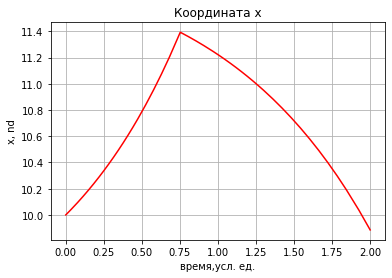

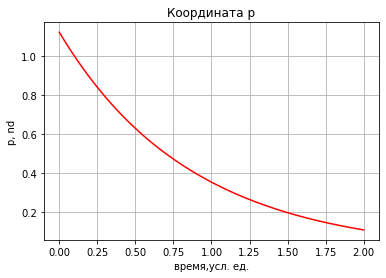

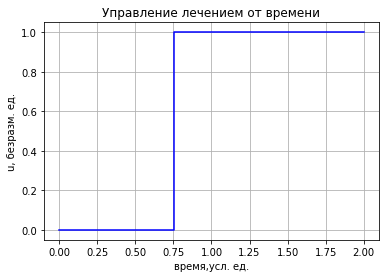

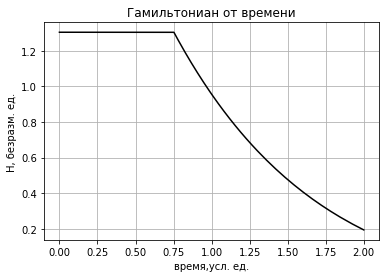

In [125]:
plotter(sol)